In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['renfe.csv']


   We load dataset into the var data using pandas function **read_csv( _dataset_path_ )**,
and we show the first rows of it using head function (by default there are show first 5, we could change it using param **n=?**)



In [2]:
data = pd.read_csv('../input/renfe.csv', index_col=0)
data.head(n=8)

/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo
6,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:45:00,2019-05-29 12:27:00,INTERCITY,62.20,Turista,Flexible
7,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 10:00:00,2019-05-29 12:32:00,AVE,47.30,Turista,Promo


As we could see, some rows have NaN value on price columns, so we need to remove them 
to prevent our model from having problems

# **Dataset Analysis**
Before start coding the model, we should know how our dataset is, which columns has similar meanings, or erasing rows with error values.
Lets see dataset'size

In [3]:
data.shape

(2579771, 9)

Next function show us the tpye of each function, something that could we use later such as selecting most important columns. In addition, we could know some numeric description of each columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579771 entries, 0 to 2579770
Data columns (total 9 columns):
insert_date    object
origin         object
destination    object
start_date     object
end_date       object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), object(8)
memory usage: 196.8+ MB


In [5]:
data.describe()

,price
count,2.269090e+06
mean,6.338550e+01
std,2.578319e+01
min,1.545000e+01
25%,4.375000e+01
50%,6.030000e+01
75%,7.880000e+01
max,2.142000e+02


All columns are object type because are strings except the price that is float. Besides, the mean price is around 63€, but we know that there are different types of train_class, so let see de mean of each class.

    1. Know classes
    2. Ask dataset

In [6]:
data.train_class.unique()

array(['Turista', 'Preferente', 'Turista con enlace', 'Turista Plus', nan,
       'Cama G. Clase', 'Cama Turista'], dtype=object)

As we could see, there is a train_class with name 'NaN', we should remove it later.

This function allows us to calculate the mean faster

In [7]:
def meanClass(train_class):
    typeClass = data[data['train_class'] == train_class]
    if not pd.isnull(train_class):
        print (train_class, '->', typeClass['price'].mean())

[](http://)# Cleaning the data

## NaN values
As we said, we need to remove wrong values as NaN.

Lets see how many wrong rows we have. We know that dataset has 2579771 rows, so we need to check if a row has a NaN value.

In [8]:
data.dropna(inplace=True)
data.shape

(2269090, 9)

We have removed 310681 rows with NaN values.

## String to Date
The next problem our dataset has is the dates, we have to separete them in different columns (year, month, day, hour, mnt, second)

In [9]:
data.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo


In [10]:
for col in ['insert_date', 'start_date', 'end_date']:
    date_col = pd.to_datetime(data[col])
    data[col + '_hour'] = date_col.dt.hour
    data[col + '_minute'] = date_col.dt.minute
    data[col + '_second'] = date_col.dt.second
    data[col + '_weekday'] = date_col.dt.weekday_name
    data[col + '_day'] = date_col.dt.day
    data[col + '_month'] = date_col.dt.month
    data[col + '_year'] = date_col.dt.year
    
    del data[col]

In [11]:
data.shape

(2269090, 27)

In [12]:
data.head()

,origin,destination,train_type,price,train_class,fare,insert_date_hour,insert_date_minute,insert_date_second,insert_date_weekday,insert_date_day,insert_date_month,insert_date_year,start_date_hour,start_date_minute,start_date_second,start_date_weekday,start_date_day,start_date_month,start_date_year,end_date_hour,end_date_minute,end_date_second,end_date_weekday,end_date_day,end_date_month,end_date_year
0,MADRID,SEVILLA,AV City,38.55,Turista,Promo,5,31,43,Friday,19,4,2019,6,20,0,Wednesday,29,5,2019,9,16,0,Wednesday,29,5,2019
1,MADRID,SEVILLA,AVE,53.40,Turista,Promo,5,31,43,Friday,19,4,2019,7,0,0,Wednesday,29,5,2019,9,32,0,Wednesday,29,5,2019
2,MADRID,SEVILLA,AVE,47.30,Turista,Promo,5,31,43,Friday,19,4,2019,7,30,0,Wednesday,29,5,2019,9,51,0,Wednesday,29,5,2019
3,MADRID,SEVILLA,AVE,69.40,Preferente,Promo,5,31,43,Friday,19,4,2019,8,0,0,Wednesday,29,5,2019,10,32,0,Wednesday,29,5,2019
5,MADRID,SEVILLA,AVE,60.30,Turista,Promo,5,31,43,Friday,19,4,2019,9,0,0,Wednesday,29,5,2019,11,38,0,Wednesday,29,5,2019


## Useless Columns
Some columns has the same value for all rows, so we should remove it. If we remove one column, we are removing one dimension of our model, and that means less error and less problems.

This information does not contribute anything to our model.

In [13]:
dropColumnsList = []

for column in data.columns:
    numValues = len(data[column].unique())
    line = column +  ' : ' + str(numValues)
    if numValues == 1:
        dropColumnsList.append(column)
        line += " (we should remove it)"
    print(line)

origin : 5
destination : 5
train_type : 15
price : 225
train_class : 6
fare : 7
insert_date_hour : 24
insert_date_minute : 60
insert_date_second : 60
insert_date_weekday : 7
insert_date_day : 29
insert_date_month : 2
insert_date_year : 1 (we should remove it)
start_date_hour : 19
start_date_minute : 26
start_date_second : 1 (we should remove it)
start_date_weekday : 7
start_date_day : 31
start_date_month : 4
start_date_year : 1 (we should remove it)
end_date_hour : 18
end_date_minute : 50
end_date_second : 1 (we should remove it)
end_date_weekday : 7
end_date_day : 31
end_date_month : 4
end_date_year : 1 (we should remove it)


In [14]:
dropColumnsList

['insert_date_year',
 'start_date_second',
 'start_date_year',
 'end_date_second',
 'end_date_year']

In dropColumnsList we have the columns to delete. Lets do it.

In [15]:
data.drop(dropColumnsList, axis=1, inplace=True)

In [16]:
data.shape

(2269090, 22)


# Building the Model

Before building the model, we should know how columns (var) are related to each other. We need to do it, because maybe we have two columns that give the same information, and remember: **less dimensions, better results**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269090 entries, 0 to 2579770
Data columns (total 22 columns):
origin                 object
destination            object
train_type             object
price                  float64
train_class            object
fare                   object
insert_date_hour       int64
insert_date_minute     int64
insert_date_second     int64
insert_date_weekday    object
insert_date_day        int64
insert_date_month      int64
start_date_hour        int64
start_date_minute      int64
start_date_weekday     object
start_date_day         int64
start_date_month       int64
end_date_hour          int64
end_date_minute        int64
end_date_weekday       object
end_date_day           int64
end_date_month         int64
dtypes: float64(1), int64(13), object(8)
memory usage: 398.2+ MB


We have some columns that are string, so we could change it to numeric values.

In [18]:
#d = {'No' : False, 'Yes' : True}
#data[_nameColumn_] = df[_nameColumn_].map(d)
#data.head()

Seaborn Library allows us to draw graphics suchs as correlation matrix or boxplots

In [19]:
import seaborn as sns

Boxplot graphic is usefull to undestand numeric data. For example the price column ...

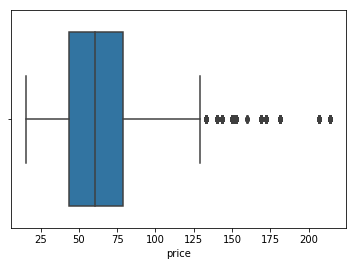

In [20]:
sns.boxplot(x='price', data=data);

**How could we interpret it?**

Both side lanes show us the max and min price people paid for their tickets. The blue box shows us the percentiles 25%-75%, that is, the price they paid between 25% and 75% of the people.

The last black points are atypical values, that is to say, we could say that these values were from tickets bought at the last minute (they are usually more expensive)


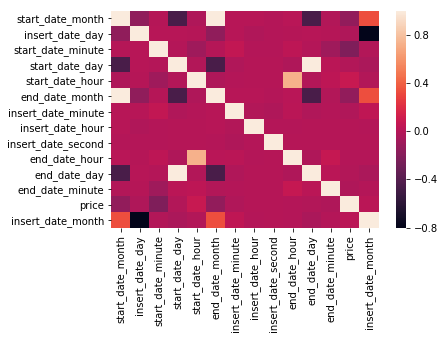

In [21]:
numerical = list(set(data.columns) - 
                 set(['origin', 'destination', 'train_type','train_class', 'fare']))

corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);

We should remove: **end_date_day && end_date_month**

In [22]:
data.drop(columns=['end_date_day', 'end_date_month'], inplace=True)

**Now we know better our dataset, lets train our model !!**

In [23]:
import warnings; warnings.simplefilter('ignore')

In [24]:
X_data = data.drop(columns='price')
labels_data = data['price'].values

Our model will predict the value of each ticket, but we have many columns with string values. We could use a library that fixes that problem.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269090 entries, 0 to 2579770
Data columns (total 20 columns):
origin                 object
destination            object
train_type             object
price                  float64
train_class            object
fare                   object
insert_date_hour       int64
insert_date_minute     int64
insert_date_second     int64
insert_date_weekday    object
insert_date_day        int64
insert_date_month      int64
start_date_hour        int64
start_date_minute      int64
start_date_weekday     object
start_date_day         int64
start_date_month       int64
end_date_hour          int64
end_date_minute        int64
end_date_weekday       object
dtypes: float64(1), int64(11), object(8)
memory usage: 363.5+ MB


In [26]:
from sklearn.preprocessing import OneHotEncoder

Next code will classificate strings into categorical values. For example, encode will know that in the train_class column there must be few values:

* Turista
* Preferente
* Turista con enlace
* Turista Plus
* Cama G. Clase
* Cama Turista

In [27]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X_data.values)

In [28]:
for category in onehotencoder.categories_:
    print(category[:5])

['BARCELONA' 'MADRID' 'PONFERRADA' 'SEVILLA' 'VALENCIA']
['BARCELONA' 'MADRID' 'PONFERRADA' 'SEVILLA' 'VALENCIA']
['ALVIA' 'AV City' 'AVE' 'AVE-LD' 'AVE-MD']
['Cama G. Clase' 'Cama Turista' 'Preferente' 'Turista' 'Turista Plus']
['Adulto ida' 'Flexible' 'Grupos Ida' 'Individual-Flexible' 'Mesa']
[0 1 2 3 4]
[0 1 2 3 4]
[0 1 2 3 4]
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday']
[1 2 3 4 5]
[4 5]
[2 5 6 7 8]
[0 3 5 8 10]
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday']
[1 2 3 4 5]
[4 5 6 7]
[0 4 8 9 10]
[0 1 2 3 4]
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday']


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn import preprocessing

In [31]:
lab_enc = preprocessing.LabelEncoder()
training_labels_encoded = lab_enc.fit_transform(labels_data)

In [32]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,training_labels_encoded,test_size=0.15, random_state=42)

In [33]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData,trainLabels,test_size=0.10, random_state=42)

# Building different models

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression

#### HOLDOUT

The first alternative to select the hyperparameters is a part of the instances of the joint validation training, and the different hyperparameters in a manual way to see which is the best solution with each of them. For this we use the new function train_test_split.

**Linear Regression**

In [35]:
%%time
model = LinearRegression()
model.fit(trainData, trainLabels)
score = model.score(testData,testLabels)
print('Linear Regression', score)

Linear Regression 0.878164681250478
CPU times: user 1min 30s, sys: 47.5 s, total: 2min 18s
Wall time: 1min 23s


**KNN**

This model is no AI-model because you neednt train it. KNN draws all train instances into the space, and them for each test instance we take nearest k-points for it.

Thats why this model doesnt learn, its always the same algorithm, but its good point of begining.

I didnt use it becuse it was too slow, but if u are beging with AI, you should know it.

<img src="https://importq.files.wordpress.com/2017/11/knn_neigh.gif?w=640&zoom=2">

**Decision Tree Classifier**

This model is 'white-box' model. We could know the process that model follows to determine the price.

In [36]:
%%time
modelArbol  = DecisionTreeClassifier(min_samples_split=8)
modelArbol.fit(trainData, trainLabels)
score = modelArbol .score(valData,valLabels)
print('Arbol de Decision', score)

Arbol de Decision 0.9841709311308477
CPU times: user 9min 34s, sys: 764 ms, total: 9min 35s
Wall time: 9min 35s


This model gives us high performance. Maybe we have overfitted our model. if we wanna check it, we could use plot_curves, which allows us to see validation curve with the function **plot_validation_curve**

**Neuronal Network**

First, lets see the easiest NN that we could code: the Perceptron.

In [37]:
%%time
modelPerceptron = Perceptron(max_iter=10,eta0=1.0,random_state=84)
modelPerceptron.fit(trainData,trainLabels)
score = modelPerceptron.score(valData,valLabels)
print('Simple Neuronal Network', score)

Simple Neuronal Network 0.6613626583295744
CPU times: user 12min 29s, sys: 580 ms, total: 12min 29s
Wall time: 12min 30s


# Test Our Model


In [38]:
%%time
print('Linear Regression in test', model.score(testData, testLabels))

Linear Regression in test 0.878164681250478
CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 22.6 ms


In [39]:
%%time
print('Tree Decission in test', modelArbol.score(testData, testLabels))

Tree Decission in test 0.9836381050874946
CPU times: user 320 ms, sys: 288 ms, total: 608 ms
Wall time: 610 ms


In [40]:
%%time
print('Neuronal Network in test', modelPerceptron.score(testData, testLabels))

Neuronal Network in test 0.6596202888672128
CPU times: user 1.16 s, sys: 736 ms, total: 1.9 s
Wall time: 1.9 s
